<a href="https://colab.research.google.com/github/elichen/aoc2017/blob/main/Day_19_A_Series_of_Tubes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
data = """     |
     |  +--+
     A  |  C
 F---|----E|--+
     |  |  |  D
     +B-+  +--+""".split('\n')

In [77]:
data = [x.rstrip('\n') for x in open("input.txt").readlines()]

not can move up   102 171


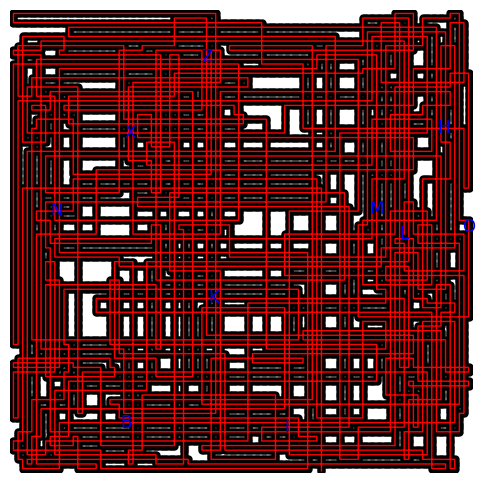

'MKXOIHZNBL'

In [69]:
def find_path_and_collect_letters(diagram):
    # Improved implementation
    def can_move(nx, ny):
        return 0 <= nx < len(diagram) and 0 <= ny < len(diagram[0]) and diagram[nx][ny] != ' '

    # Initialize plot
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_aspect('equal')
    ax.invert_yaxis()  # Invert y axis to match the input diagram's orientation
    ax.axis('off')

    nrows, ncols = len(diagram), len(diagram[0])
    ax.set_xlim(-0.5, ncols - 0.5)
    ax.set_ylim(-0.5, nrows - 0.5)

    # Plot the diagram
    for x in range(nrows):
        for y in range(ncols):
            if diagram[x][y] in '|-+':
                ax.plot(y, x, 'ko', markersize=5)  # Path
            elif diagram[x][y].isalpha():
                ax.text(y, x, diagram[x][y], color='blue', fontsize=12, ha='center', va='center')

    # Find the starting point
    start_col = diagram[0].index('|')
    direction = 'down'
    x, y = 0, start_col
    path_x, path_y = [y], [x]
    letters = ''
    moves = {'down': (1, 0), 'up': (-1, 0), 'right': (0, 1), 'left': (0, -1)}

    while True:
        # print(diagram[x][y], x,y)
        x += moves[direction][0]
        y += moves[direction][1]

        if not can_move(x, y):
            break
        path_x.append(y)
        path_y.append(x)
        current_char = diagram[x][y]

        if current_char.isalpha():
            letters += current_char

        if current_char == '+':
            # Determine new direction
            for dir, (dx, dy) in moves.items():
                if dir == direction:
                    continue  # Skip current direction
                if (direction in ['down', 'up'] and dir in ['left', 'right']) or \
                   (direction in ['left', 'right'] and dir in ['down', 'up']):
                    if can_move(x + dx, y + dy):
                        direction = dir
                        break

    ax.plot(path_x, path_y, 'r-', linewidth=1)  # Red line for traversal path
    plt.show()

    return letters

find_path_and_collect_letters(data)

In [78]:
def find_path_and_collect_letters(diagram):
    # Improved implementation
    def can_move(nx, ny):
        return 0 <= nx < len(diagram) and 0 <= ny < len(diagram[0]) and diagram[nx][ny] != ' '

    # Find the starting point
    start_col = diagram[0].index('|')
    direction = 'down'
    x, y = 0, start_col
    steps = 1
    moves = {'down': (1, 0), 'up': (-1, 0), 'right': (0, 1), 'left': (0, -1)}

    while True:
        x += moves[direction][0]
        y += moves[direction][1]

        if not can_move(x, y):
            break
        current_char = diagram[x][y]
        steps += 1

        if current_char == '+':
            # Determine new direction
            for dir, (dx, dy) in moves.items():
                if dir == direction:
                    continue  # Skip current direction
                if (direction in ['down', 'up'] and dir in ['left', 'right']) or \
                   (direction in ['left', 'right'] and dir in ['down', 'up']):
                    if can_move(x + dx, y + dy):
                        direction = dir
                        break

    return steps

find_path_and_collect_letters(data)

17872